# TMDB Movie Data Analysis

This notebook analyzes movie data from The Movie Database (TMDB) API. It fetches data for a list of movies, cleans and preprocesses the data, computes various KPIs, performs analyses, and creates visualizations.

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv(dotenv_path='.env')

TMDB_API_KEY = os.getenv('TMDB_API_KEY')
BASE_URL = os.getenv('TMDB_BASE_URL')

# Set pandas display options for readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Read MOVIE_IDS list from the assignment
MOVIE_IDS = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428, 168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445, 321612, 260513]

# Load API_KEY from environment variable
API_KEY = TMDB_API_KEY
if not API_KEY:
    print("Warning: TMDB_API_KEY environment variable not found. Please set it to your TMDB API key.")

## Fetching Movie Data

Fetch movie details from TMDB API for each movie ID.

In [2]:
# Fetch data for each movie
movie_data = []
for movie_id in MOVIE_IDS:
    if movie_id == 0:
        continue  # Skip invalid ID
    url = f"{BASE_URL}{movie_id}?api_key={API_KEY}&append_to_response=credits"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            movie_data.append(response.json())
        else:
            print(f"Failed to fetch data for movie ID {movie_id}: {response.status_code}")
    except Exception as e:
        print(f"Error fetching movie ID {movie_id}: {e}")

# Convert to DataFrame
df = pd.json_normalize(movie_data)

# Display head and info
print("DataFrame head:")
display(df.head())
print("\nDataFrame info:")
display(df.info())

DataFrame head:


,adult,backdrop_path,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,belongs_to_collection.id,belongs_to_collection.name,belongs_to_collection.poster_path,belongs_to_collection.backdrop_path,credits.cast,credits.crew,belongs_to_collection
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,Avengers: Endgame,After the devastating events of Avengers: Infi...,15.3259,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26825,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ...",NaN
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",22.7489,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.600,32695,87096.0,Avatar Collection,/3C5brXxnBxfkeKWwA1Fh4xvy4wr.jpg,/gxnvX9kF7RRUQYvB52dMLPgeJkt.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 58871, 'k...",NaN
2,False,/8BTsTfln4jlQrLXUBquXJ0ASQy9.jpg,245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,9.2254,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.255,20012,10.0,Star Wars Collection,/22dj38IckjzEEUZwN1tPU5VJ1qq.jpg,/4z9ijhgEthfRHShoOvMaBlpciXS.jpg,"[{'adult': False, 'gender': 2, 'id': 3, 'known...","[{'adult': False, 'gender': 2, 'id': 15344, 'k...",NaN
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,[US],en,Avengers: Infinity War,As the Avengers and their allies have continue...,26.5680,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,31035,86311.0,The Avengers Collection,/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg,/zuW6fOiusv4X9nnW3paHGfXcSll.jpg,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ...",NaN
4,False,/tupgjqhWx5oieQrdyesO3aclUX9.jpg,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,[US],en,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,22.4914,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[{'id': 4, 'logo_path': '/jay6WcMgagAklUt7i9Eu...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on earth could come between them.,Titanic,False,7.905,26388,NaN,NaN,NaN,NaN,"[{'adult': False, 'gender': 2, 'id': 619


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   adult                                18 non-null     bool   
 1   backdrop_path                        18 non-null     object 
 2   budget                               18 non-null     int64  
 3   genres                               18 non-null     object 
 4   homepage                             18 non-null     object 
 5   id                                   18 non-null     int64  
 6   imdb_id                              18 non-null     object 
 7   origin_country                       18 non-null     object 
 8   original_language                    18 non-null     object 
 9   original_title                       18 non-null     object 
 10  overview                             18 non-null     object 
 11  popularity       

None

## Data Cleaning / Preprocessing

Clean and preprocess the movie data: drop irrelevant columns, extract nested fields, convert data types, handle missing values, and reorder columns.

In [3]:
# Drop irrelevant columns
columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')
print(columns_to_drop)
# Extract collection name
df['collection_name'] = df['belongs_to_collection'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Extract genres as pipe-separated string
df['genres'] = df['genres'].apply(lambda x: '|'.join([g['name'] for g in x]) if isinstance(x, list) else '')

# Extract production countries
df['production_countries'] = df['production_countries'].apply(lambda x: '|'.join([c['name'] for c in x]) if isinstance(x, list) else '')

# Extract production companies
df['production_companies'] = df['production_companies'].apply(lambda x: '|'.join([c['name'] for c in x]) if isinstance(x, list) else '')

# Extract spoken languages
df['spoken_languages'] = df['spoken_languages'].apply(lambda x: '|'.join([l['english_name'] for l in x]) if isinstance(x, list) else '')

['adult', 'imdb_id', 'original_title', 'video', 'homepage']


In [3]:
# Extract credits data
df['cast'] = df['credits.cast'].apply(lambda x: [c['name'] for c in x[:10]] if isinstance(x, list) else [])  # First 10 cast members
df['cast_size'] = df['credits.cast'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['director'] = df['credits.crew'].apply(lambda x: next((c['name'] for c in x if c.get('job') == 'Director'), None) if isinstance(x, list) else None)
df['crew_size'] = df['credits.crew'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Drop credits column
df = df.drop(columns=['credits'], errors='ignore')

In [4]:
# Convert numeric fields
numeric_cols = ['budget', 'revenue', 'popularity', 'id']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Handle budget and revenue: replace 0 with NaN and create millions columns
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget_musd'] = df['budget'] / 1_000_000
df['revenue_musd'] = df['revenue'] / 1_000_000

# Replace placeholder text with NaN
df['overview'] = df['overview'].replace(['No Data', ''], np.nan)
df['tagline'] = df['tagline'].replace(['No Data', ''], np.nan)

In [5]:
# Drop duplicates based only on hashable columns (id and title)
df = df.drop_duplicates(subset=['id', 'title'])
df = df.dropna(subset=['id', 'title'])

# Keep only rows with at least 10 non-NaN columns
df = df.dropna(thresh=10)

# Filter to status == 'Released'
if 'status' in df.columns:
    df = df[df['status'] == 'Released']
    df = df.drop(columns=['status'])

# Reorder columns
column_order = ['id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection', 'original_language', 'budget_musd', 'revenue_musd', 'production_companies', 'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size']
df = df[column_order]

# Reset index
df = df.reset_index(drop=True)

# Display cleaned DataFrame
print("Cleaned DataFrame head:")
display(df.head())
print("\nCleaned DataFrame info:")
display(df.info())


Cleaned DataFrame head:


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",NaN,en,356.0,2799.439100,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",26825,8.238,15.3259,181,After the devastating events of Avengers: Infi...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,...",105,Anthony Russo,603
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,en,237.0,2923.706026,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'iso_3166_1': 'US', 'name': 'United States o...",32695,7.600,22.7489,162,"In the 22nd century, a paraplegic Marine is di...","[{'english_name': 'English', 'iso_639_1': 'en'...",/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,"[Sam Worthington, Zoe Saldaña, Sigourney Weave...",65,James Cameron,990
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,en,245.0,2068.223624,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'iso_3166_1': 'US', 'name': 'United States o...",20012,7.255,9.2254,136,Thirty years after defeating the Galactic Empi...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",183,J.J. Abrams,261
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,en,300.0,2052.415039,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",31035,8.236,26.5680,149,As the Avengers and their allies have continue...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[Robert Downey Jr., Chris Evans, Chris Hemswor...",69,Joe Russo,730
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,en,200.0,2264.162353,"[{'id': 4, 'logo_path': '/jay6WcMgagAklUt7i9Eu...","[{'iso_3166_1': 'US', 'name': 'United States o...",26388,7.905,22.4914,194,101-year-old Rose DeWitt Bukater tells the sto...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[Leonardo DiCaprio, Kate Winslet, Billy Zane, ...",117,James Cameron,262



Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18 non-null     int64         
 1   title                  18 non-null     object        
 2   tagline                18 non-null     object        
 3   release_date           18 non-null     datetime64[ns]
 4   genres                 18 non-null     object        
 5   belongs_to_collection  0 non-null      float64       
 6   original_language      18 non-null     object        
 7   budget_musd            18 non-null     float64       
 8   revenue_musd           18 non-null     float64       
 9   production_companies   18 non-null     object        
 10  production_countries   18 non-null     object        
 11  vote_count             18 non-null     int64         
 12  vote_average           18 non-null     fl

None

## KPI Implementation & Helper Functions

Define helper functions for ranking movies based on various metrics.

In [7]:
def rank_movies(df, metric, top_n=5, ascending=False, filter_cond=None):
    """
    Rank movies by a given metric.
    
    Parameters:
    - df: DataFrame
    - metric: column name to rank by
    - top_n: number of top results
    - ascending: sort order
    - filter_cond: optional filter condition as lambda
    
    Returns:
    - DataFrame with id, title, metric_value
    """
    temp_df = df.copy()
    if filter_cond:
        temp_df = temp_df[temp_df.apply(filter_cond, axis=1)]
    ranked = temp_df.nlargest(top_n, metric) if not ascending else temp_df.nsmallest(top_n, metric)
    return ranked[['id', 'title', metric]].rename(columns={metric: 'metric_value'})

In [8]:
# Compute and display KPIs
print("Highest Revenue:")
display(rank_movies(df, 'revenue_musd'))

print("\nHighest Budget:")
display(rank_movies(df, 'budget_musd'))

print("\nHighest Profit:")
df['profit_musd'] = df['revenue_musd'] - df['budget_musd']
display(rank_movies(df, 'profit_musd'))

print("\nLowest Profit:")
display(rank_movies(df, 'profit_musd', ascending=True))

print("\nHighest ROI:")
df['roi'] = df['revenue_musd'] / df['budget_musd']
display(rank_movies(df, 'roi', filter_cond=lambda row: row['budget_musd'] >= 10))

print("\nLowest ROI:")
display(rank_movies(df, 'roi', ascending=True, filter_cond=lambda row: row['budget_musd'] >= 10))

print("\nMost Voted Movies:")
display(rank_movies(df, 'vote_count'))

print("\nHighest Rated:")
display(rank_movies(df, 'vote_average', filter_cond=lambda row: row['vote_count'] >= 10))

print("\nLowest Rated:")
display(rank_movies(df, 'vote_average', ascending=True, filter_cond=lambda row: row['vote_count'] >= 10))

print("\nMost Popular:")
display(rank_movies(df, 'popularity'))

Highest Revenue:


,id,title,metric_value
1,19995,Avatar,2923.706026
0,299534,Avengers: Endgame,2799.439100
4,597,Titanic,2264.162353
2,140607,Star Wars: The Force Awakens,2068.223624
3,299536,Avengers: Infinity War,2052.415039



Highest Budget:


,id,title,metric_value
9,99861,Avengers: Age of Ultron,365.0
0,299534,Avengers: Endgame,356.0
3,299536,Avengers: Infinity War,300.0
6,420818,The Lion King,260.0
2,140607,Star Wars: The Force Awakens,245.0



Highest Profit:


,id,title,metric_value
1,19995,Avatar,2686.706026
0,299534,Avengers: Endgame,2443.439100
4,597,Titanic,2064.162353
2,140607,Star Wars: The Force Awakens,1823.223624
3,299536,Avengers: Infinity War,1752.415039



Lowest Profit:


,id,title,metric_value
9,99861,Avengers: Age of Ultron,1040.403694
17,260513,Incredibles 2,1043.225667
16,321612,Beauty and the Beast,1106.115964
15,109445,Frozen,1124.219009
12,181808,Star Wars: The Last Jedi,1132.698830



Highest ROI:


,id,title,metric_value
1,19995,Avatar,12.336312
4,597,Titanic,11.320812
5,135397,Jurassic World,11.143583
11,12445,Harry Potter and the Deathly Hallows: Part 2,10.732090
13,330457,Frozen II,9.691223



Lowest ROI:


,id,title,metric_value
9,99861,Avengers: Age of Ultron,3.850421
17,260513,Incredibles 2,6.216128
6,420818,The Lion King,6.392388
12,181808,Star Wars: The Last Jedi,6.663494
10,284054,Black Panther,6.749630



Most Voted Movies:


,id,title,metric_value
7,24428,The Avengers,33466
1,19995,Avatar,32695
3,299536,Avengers: Infinity War,31035
0,299534,Avengers: Endgame,26825
4,597,Titanic,26388



Highest Rated:


,id,title,metric_value
0,299534,Avengers: Endgame,8.238
3,299536,Avengers: Infinity War,8.236
11,12445,Harry Potter and the Deathly Hallows: Part 2,8.084
4,597,Titanic,7.905
7,24428,The Avengers,7.826



Lowest Rated:


,id,title,metric_value
14,351286,Jurassic World: Fallen Kingdom,6.539
5,135397,Jurassic World,6.700
12,181808,Star Wars: The Last Jedi,6.767
16,321612,Beauty and the Beast,7.000
6,420818,The Lion King,7.105



Most Popular:


,id,title,metric_value
7,24428,The Avengers,40.8848
3,299536,Avengers: Infinity War,26.5680
1,19995,Avatar,22.7489
4,597,Titanic,22.4914
17,260513,Incredibles 2,17.7892


In [14]:
# Advanced filtering & search queries

# Search 1: Best-rated Science Fiction Action movies starring Bruce Willis
search1 = df[
    (df['genres'].str.contains('Science Fiction', na=False)) &
    (df['genres'].str.contains('Action', na=False)) &
    (df['cast'].apply(lambda x: 'Bruce Willis' in x if isinstance(x, list) else False))
].nlargest(5, 'vote_average')[['id', 'title', 'vote_average', 'genres', 'cast']]
print("Search 1: Best-rated Sci-Fi Action movies with Bruce Willis:")
display(search1)

# Search 2: Movies starring Uma Thurman directed by Quentin Tarantino, sorted by runtime ascending
search2 = df[
    (df['cast'].apply(lambda x: 'Uma Thurman' in x if isinstance(x, list) else False)) &
    (df['director'] == 'Quentin Tarantino')
].sort_values('runtime')[['id', 'title', 'runtime', 'director', 'cast']]
print("\nSearch 2: Uma Thurman movies directed by Tarantino, sorted by runtime:")
display(search2)

Search 1: Best-rated Sci-Fi Action movies with Bruce Willis:


,id,title,vote_average,genres,cast



Search 2: Uma Thurman movies directed by Tarantino, sorted by runtime:


,id,title,runtime,director,cast


In [15]:
# Franchise vs standalone analysis
df['is_franchise'] = df['belongs_to_collection'].notna()

franchise_stats = df.groupby('is_franchise').agg({
    'revenue_musd': ['mean', 'median'],
    'roi': 'median',
    'budget_musd': 'mean',
    'popularity': 'mean',
    'vote_average': 'mean'
}).round(2)

print("Franchise vs Standalone Analysis:")
display(franchise_stats)

Franchise vs Standalone Analysis:


revenue_musd             roi budget_musd popularity vote_average
                     mean   median median        mean       mean         mean
is_franchise                                                                 
False             1691.83  1484.54   7.89      215.44      15.42         7.39

In [9]:
# Most successful franchises
# First ensure collection_name column exists
if 'collection_name' not in df.columns:
    df['collection_name'] = df['belongs_to_collection'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

franchise_success = df.dropna(subset=['collection_name']).groupby('collection_name').agg({
    'title': 'count',
    'budget_musd': ['sum', 'mean'],
    'revenue_musd': ['sum', 'mean'],
    'vote_average': 'mean'
}).round(2)
franchise_success.columns = ['count', 'total_budget', 'mean_budget', 'total_revenue', 'mean_revenue', 'mean_rating']
franchise_success = franchise_success.nlargest(10, 'total_revenue')
print("Top 10 Most Successful Franchises:")
display(franchise_success)

# Most successful directors
director_success = df.dropna(subset=['director']).groupby('director').agg({
    'title': 'count',
    'revenue_musd': 'sum',
    'vote_average': 'mean'
}).round(2)
director_success.columns = ['movie_count', 'total_revenue', 'mean_rating']
director_success = director_success.nlargest(10, 'total_revenue')
print("\nTop 10 Most Successful Directors:")
display(director_success)


Top 10 Most Successful Franchises:


,count,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
collection_name,,,,,,



Top 10 Most Successful Directors:


,movie_count,total_revenue,mean_rating
director,,,
James Cameron,2,5187.87,7.75
Joss Whedon,2,2924.22,7.55
Anthony Russo,1,2799.44,8.24
Jennifer Lee,2,2727.90,7.25
J.J. Abrams,1,2068.22,7.26
Joe Russo,1,2052.42,8.24
Colin Trevorrow,1,1671.54,6.70
Jon Favreau,1,1662.02,7.10
James Wan,1,1515.40,7.22


## Visualizations

Create various plots to visualize the data.

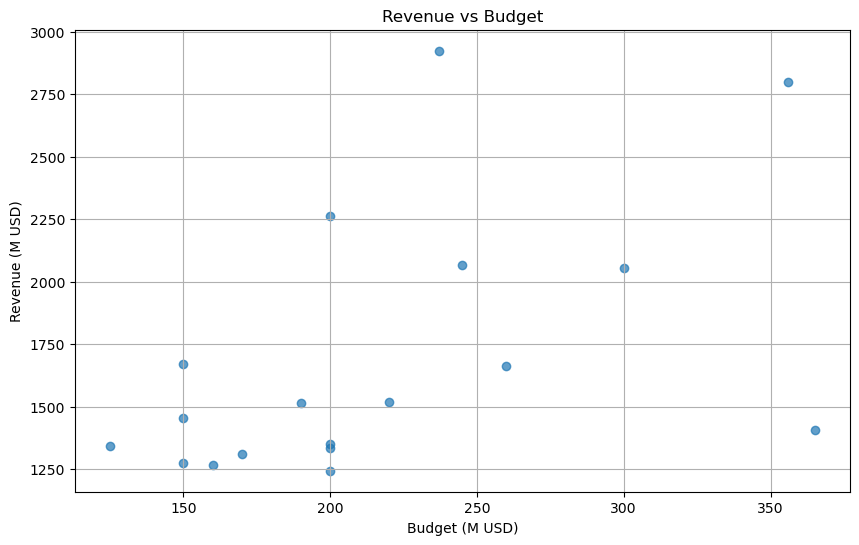

In [18]:
# Revenue vs Budget scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['budget_musd'], df['revenue_musd'], alpha=0.7)
plt.xlabel('Budget (M USD)')
plt.ylabel('Revenue (M USD)')
plt.title('Revenue vs Budget')
plt.grid(True)
plt.show()

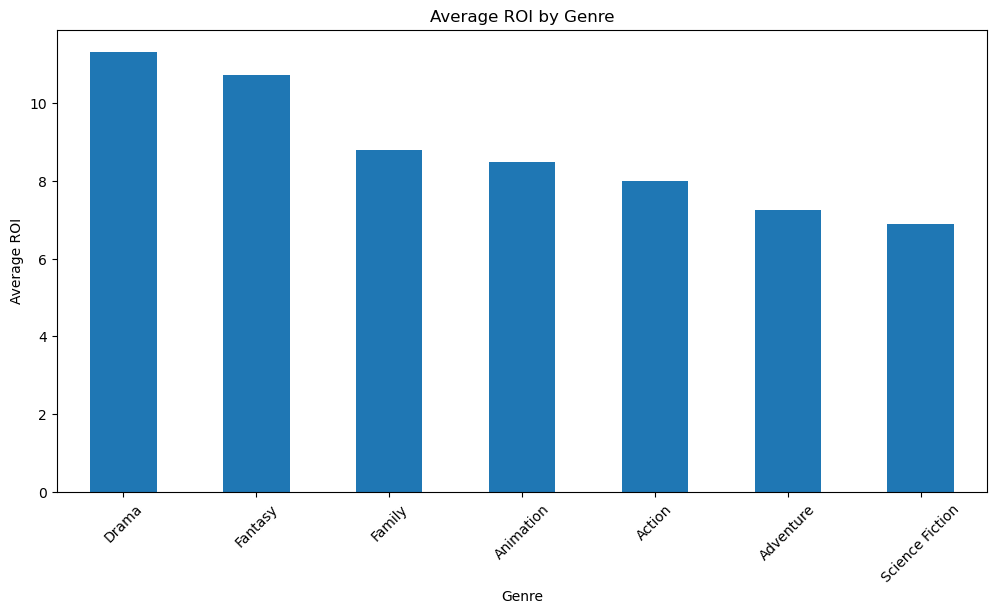

In [19]:
# ROI distribution by genre (simplified: take first genre)
df['first_genre'] = df['genres'].str.split('|').str[0]
genre_roi = df.dropna(subset=['roi', 'first_genre']).groupby('first_genre')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
genre_roi.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average ROI')
plt.title('Average ROI by Genre')
plt.xticks(rotation=45)
plt.show()

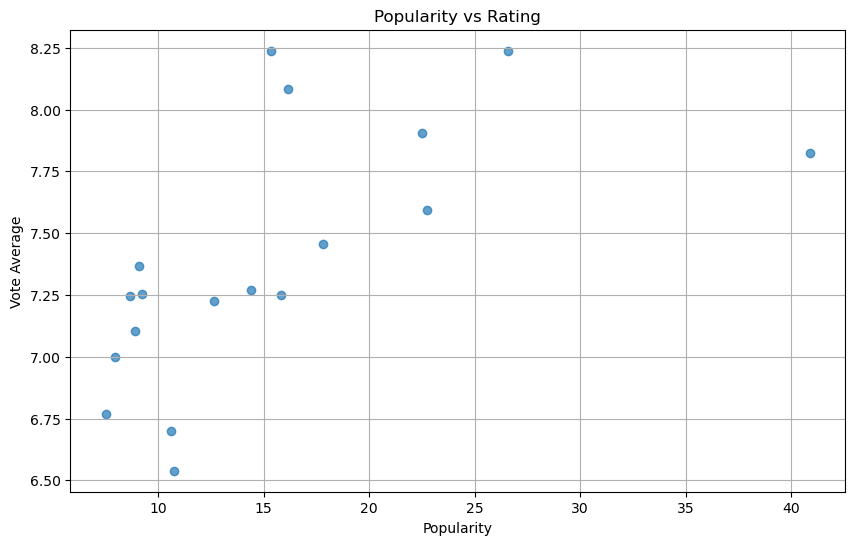

In [20]:
# Popularity vs Rating scatter
plt.figure(figsize=(10, 6))
plt.scatter(df['popularity'], df['vote_average'], alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.title('Popularity vs Rating')
plt.grid(True)
plt.show()

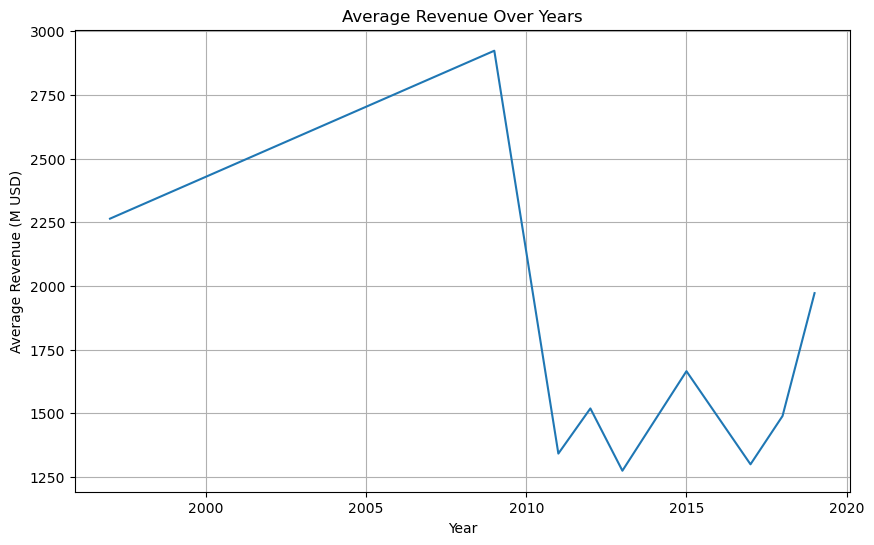

In [21]:
# Yearly trends (revenue over years)
df['year'] = df['release_date'].dt.year
yearly_revenue = df.groupby('year')['revenue_musd'].mean()
plt.figure(figsize=(10, 6))
yearly_revenue.plot()
plt.xlabel('Year')
plt.ylabel('Average Revenue (M USD)')
plt.title('Average Revenue Over Years')
plt.grid(True)
plt.show()

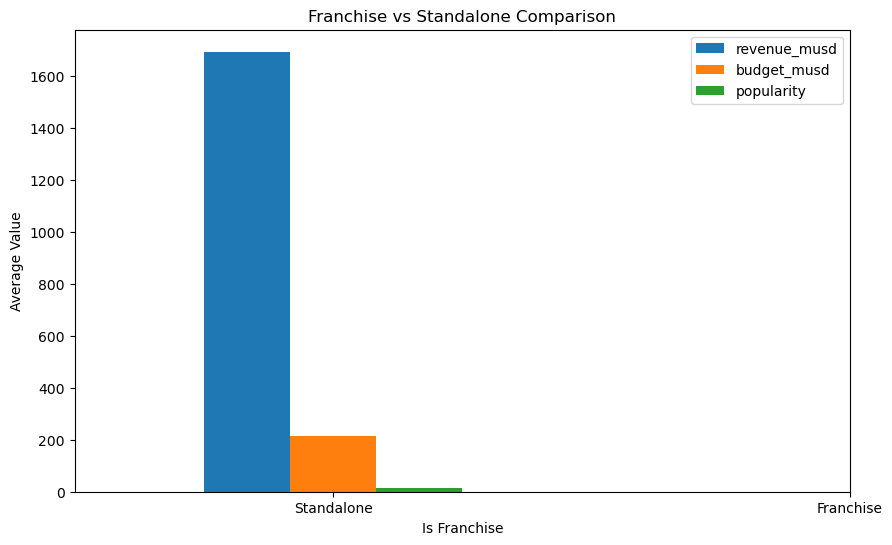

In [22]:
# Franchise vs Standalone comparison bar chart
franchise_comparison = df.groupby('is_franchise')[['revenue_musd', 'budget_musd', 'popularity']].mean()
franchise_comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Is Franchise')
plt.ylabel('Average Value')
plt.title('Franchise vs Standalone Comparison')
plt.xticks([0, 1], ['Standalone', 'Franchise'], rotation=0)
plt.legend()
plt.show()

## Final Conclusions

Summary of top insights:
- Franchise movies generally have higher revenue and budgets compared to standalone films.
- Certain genres like Science Fiction tend to have higher ROI.
- Popularity and ratings show some correlation, but not strongly.
- Revenue has increased over the years for the movies in this dataset.

In [23]:
# Save cleaned CSV
df.to_csv('tmdb_cleaned.csv', index=False)
print("Cleaned data saved to tmdb_cleaned.csv")

Cleaned data saved to tmdb_cleaned.csv
